In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

#import nltk
import string
#from nltk.corpus import stopwords
#from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#data = pd.read_csv('C:/Users/Lenovo/EncryptixML/spam.csv')
train_path = "C:/Users/Lenovo/EncryptixML/Genre Classification Dataset/train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
train_data

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [3]:
test_path = "C:/Users/Lenovo/EncryptixML/Genre Classification Dataset/test_data_solution.txt"
test_data = pd.read_csv(test_path, sep=':::', names=['Title','Genre', 'Description'], engine='python')
test_data

,Title,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...
54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."


In [4]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [5]:
test_data.describe()

,Title,Genre,Description
count,54200,54200,54200
unique,54200,27,54072
top,Edgar's Lunch (1998),drama,Grammy - music award of the American academy ...
freq,1,13612,10


In [6]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [7]:
test_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [8]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 54200 entries, 1 to 54200
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54200 non-null  object
 1   Genre        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None


In [9]:
class_distribution = train_data['Genre'].value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64


In [10]:
imbalance_ratio = class_distribution.min() / class_distribution.max()
print("Imbalance Ratio:", imbalance_ratio)

Imbalance Ratio: 0.009696613531183427


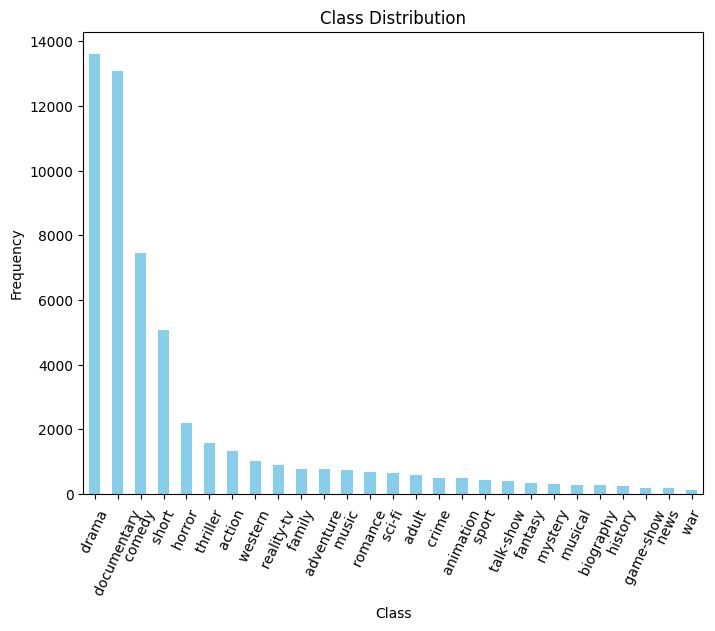

In [11]:
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=65)
plt.show()

In [12]:


# DROP DUPLICATE ROWS FROM THE TRAINING DATASET
train_data = train_data.drop_duplicates(keep ='first')

# DROP DUPLICATE ROWS FROM THE TEST DATASET
test_data = test_data.drop_duplicates(keep = 'first')



In [13]:
train_data

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_data['Genre'] = encoder.fit_transform(train_data['Genre'])


In [15]:
train_data

,Title,Genre,Description
1,Oscar et la dame rose (2009),8,Listening in to a conversation between his do...
2,Cupid (1997),24,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",1,As the bus empties the students for their fie...
4,The Secret Sin (1915),8,To help their unemployed father make ends mee...
5,The Unrecovered (2007),8,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",5,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),13,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),7,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),5,Walter and Vivian live in the country and hav...


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
test_data['Genre'] = encoder.fit_transform(test_data['Genre'])

In [17]:
test_data

,Title,Genre,Description
1,Edgar's Lunch (1998),24,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),5,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),7,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),8,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),8,Before he was known internationally as a mart...
...,...,...,...
54196,"""Tales of Light & Dark"" (2013)",13,"Covering multiple genres, Tales of Light & Da..."
54197,Der letzte Mohikaner (1965),26,As Alice and Cora Munro attempt to find their...
54198,Oliver Twink (2007),1,A movie 169 years in the making. Oliver Twist...
54199,Slipstream (1973),8,"Popular, but mysterious rock D.J Mike Mallard..."


In [18]:
x_train = train_data['Description']
y_train = train_data ['Genre']
x_test = test_data['Description']
y_test = test_data['Genre']

In [19]:
y_train

1         8
2        24
3         1
4         8
5         8
         ..
54210     5
54211    13
54212     7
54213     5
54214    12
Name: Genre, Length: 54214, dtype: int32

In [20]:
tfidf_vectorizer = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True, max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Description'])
X_test_tfidf= tfidf_vectorizer.transform(x_test)


nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)


y_test_pred = nb_classifier.predict(X_test_tfidf)


print("Accuracy on training set:", accuracy_score(y_test, y_test_pred))
print("Classification Report on training set:\n", classification_report(y_test, y_test_pred))

Accuracy on training set: 0.5238560885608856
Classification Report on training set:
               precision    recall  f1-score   support

           0       0.55      0.11      0.18      1314
           1       0.51      0.06      0.11       590
           2       0.81      0.07      0.13       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.51      0.42      0.46      7446
           6       0.00      0.00      0.00       505
           7       0.57      0.87      0.69     13096
           8       0.46      0.82      0.59     13612
           9       0.50      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.98      0.32      0.48       193
          12       0.00      0.00      0.00       243
          13       0.69      0.36      0.47      2204
          14       0.74      0.15      0.25       731
          15       0.00      0.00      0.00       

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1

<Axes: title={'center': 'Naive Bias Test: '}>

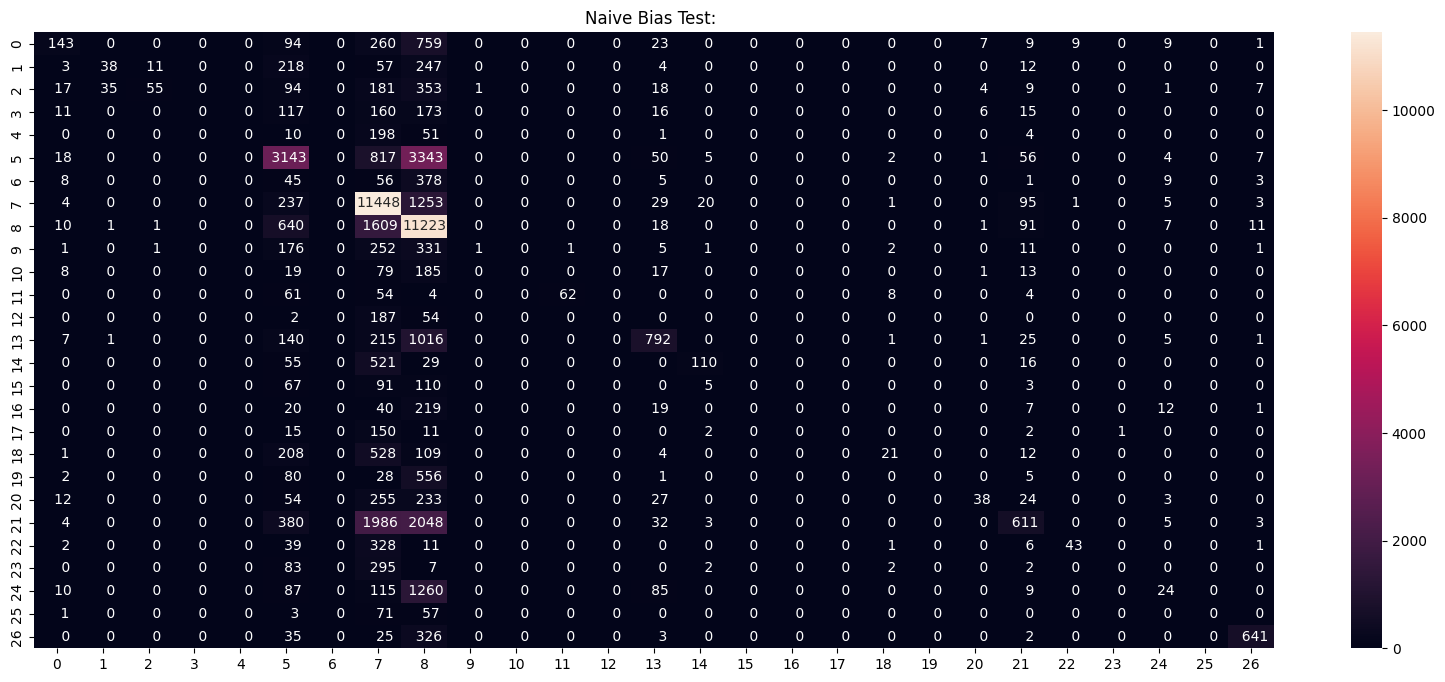

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

cm2 = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(20,8))
plt.title("Naive Bias Test: ")
sns.heatmap(cm2,annot=True,fmt="5g")
#confusion_matrix = confusion_matrix(y_test, y_test_pred)
#cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
#cm_display.plot()
#plt.figure(figsize=(20,8))
#plt.show()
#sns.heatmap(confusion_matrix,annot=True,fmt="2g")

In [22]:
from sklearn.linear_model import LogisticRegression

tfidf_vectorizer = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True, max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Description'])
X_test_tfidf= tfidf_vectorizer.transform(x_test)


nb_classifier = LogisticRegression()
nb_classifier.fit(X_train_tfidf, y_train)


y_test_pred = nb_classifier.predict(X_test_tfidf)


print("Accuracy on training set:", accuracy_score(y_test, y_test_pred))

Accuracy on training set: 0.583579335793358


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: title={'center': 'Logistic Regression Test: '}>

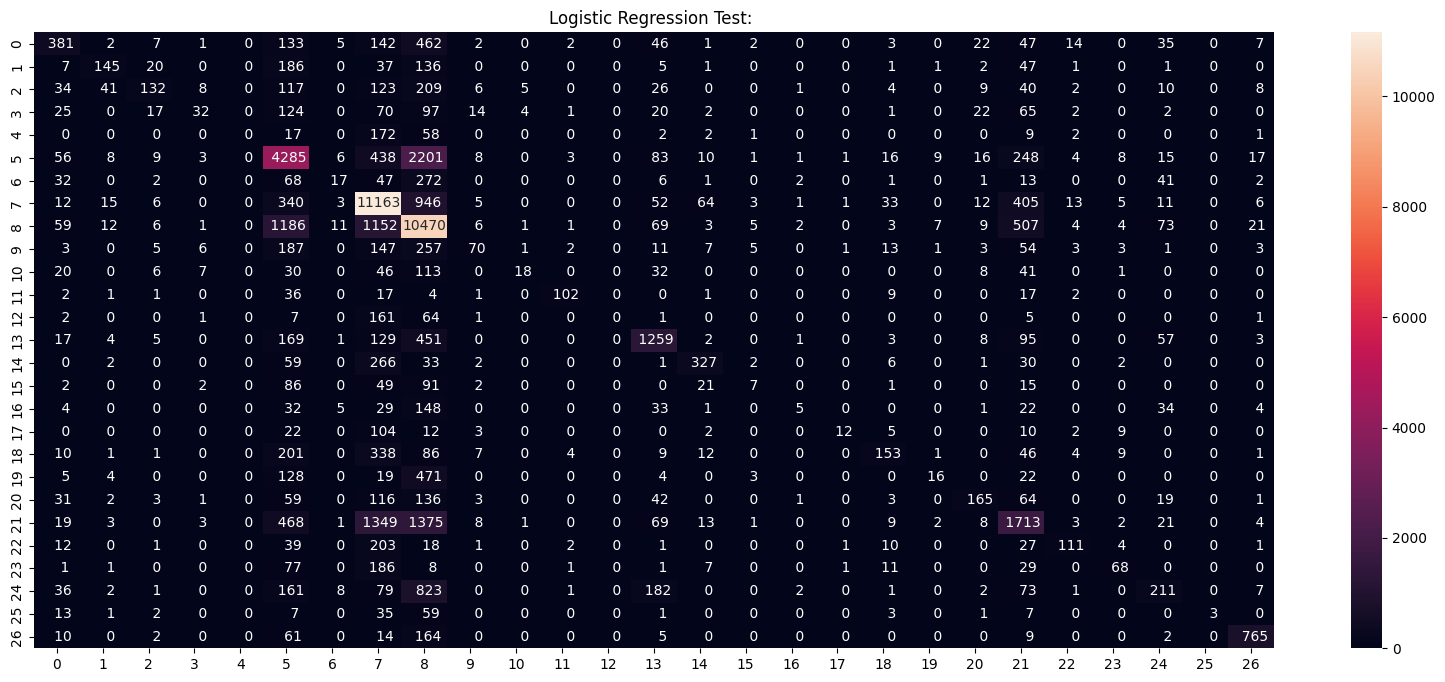

In [23]:
cm2 = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(20,8))
plt.title("Logistic Regression Test: ")
sns.heatmap(cm2,annot=True,fmt="5g")